### <u>Imports<u>

In [2]:
import numpy as np
import pandas as pd
import random

### <u>inputs<u>

In [49]:
nx = 108 
ny = 100
nz = 63
nt = nx * ny * nz

n_models = 20


#               14    12    15c   11B    1C
#x = np.array([[1873, 3389, 3614, 4532, 1528]])   # BT1
x = np.array([[308, 2605, 4782,  4399, 4149]])   # BT2
#x = np.array([[3720, 273,  4777, 1937, 2257]])   # BT3
#x = np.array([[2719, 2845, 4478, 3971, 1846]])   # BT4
#x = np.array([[4965, 568,  779, 4472, 4494 ]])   # BT5

df_lhs = pd.DataFrame(np.tile(x,(n_models,1)))   # 5 is the number of wells
df_lhs.columns = ["pf11b_rates", "pf12_rates", "pf14_rates", "pf1c_rates", "pf15c_rates"]

### <u>Functions<u>

In [50]:
# For Plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps, data, min_leg, max_leg):
    
    n = len(colormaps)
    fig, axs = plt.subplots(figsize=(9, 3), constrained_layout=True, squeeze=False)
    
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=min_leg, vmax=max_leg, edgecolor = 'lightgrey', linewidth = 0.005)
        fig.colorbar(psm, ax=ax)
        
    plt.xlim([5, 75])   # limit the axis range
    plt.ylim([0, 20])
    plt.axis('off')    # remove the axis title
    plt.show()

#### Function to read the text files

In [51]:
# function for reading the text files and extracting the numbers
def splitter(file):
    import re
    lines = file.readlines()
    B = [x for x in lines if not x.startswith('--')]
    C = " ".join(B)
    nums = []
    #                  3*4.52            4*0            0\n          4.235e-10 or 4.235E-10       5e-10 or 5E-10 
    for n in re.findall(r'\d+\*\d+\.\d+|\d+\*\d+|[0]\ |[0]\n|\d+\.\d+(?:e[+-]\d+|E[-+]\d+)?|\d+(?:e[+-]\d+|E[-+]\d+)?', C):                 
        split_by_ast = n.split("*")
        if len(split_by_ast) == 1:
            nums += [float(split_by_ast[0])]
        else:
            nums += [float(split_by_ast[1])] * int(split_by_ast[0])
    return nums


# defining a function to get the text file and expand it

def split(a):
    import numpy as np
    b = a.readlines()
    c = [x.replace('\n','') for x in b]
    d = [j for i in c for j in i.split()]
    e=[]
    for i in d:
        if "*" in i:
            a=[i.split("*")[1]]*int(i.split("*")[0])
            e.extend(a)
        else:
            e.append(i)
    f = np.array(e)
    g = [float(numeric_string) for numeric_string in f]
    h = np.array(g)
    return h

#### The below cell is for forcing the output cell from autoscrolling 

In [52]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Real Outputs at different timesteps

## Dataset SO

In [113]:
a = open('C:/Users/pymnb/Downloads/VOLVE/15/features/001.soil.for.location.txt', 'r')

SOIL = np.array(splitter(a)).reshape((nt, 1), order='F')
SOIL[SOIL < 0.053] = 0

#removing a few grids where they were out of the main reservoir in VOLVE field
indices = [554377, 565177, 575977, 576085, 586777, 586885, 597577, 597685, 608377, 608485, 619177,\
619285, 629977, 630085, 640777, 640885, 651577, 651685, 662377, 662485, 673177, 673285]

SOIL[indices]=0
actives = np.where(SOIL!=0)[0]

non_actives = np.delete(np.arange(1,nt+1), actives)

textfile_SO = open('C:/Users/pymnb/Downloads/VOLVE/15/features/bt2_SO.txt','r')
textfile_P  = open('C:/Users/pymnb/Downloads/VOLVE/15/features/bt2_P.txt','r')

SO_real = np.array(splitter(textfile_SO)).reshape((nx*ny*nz, n_models), order='F')
print(SO_real.shape)
P_real  = np.array(splitter(textfile_P)).reshape((nx*ny*nz, n_models), order='F')

#SO_real[non_actives-1] = 0
#P_real[non_actives-1] = 0

(680400, 20)
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.    ]
 [  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.    ]
 [365.9641 370.2347 371.9886 373.0302 373.8159 374.4292 374.9714 375.4325
  375.8167 376.1626 376.4686 376.7594 377.0198 377.263  377.4837 377.689
  377.8863 378.0617 378.2252 378.3854]
 [364.6782 368.8883 370.5898 371.6252 372.4077 373.0199 373.5593 374.0227
  374.408  374.7538 375.0599 375.351  375.6118 375.8552 376.0762 376.2817
  376.4792 376.6548 376.8185 376.979 ]
 [364.9879 369.2021 370.9065 371.9402 372.7183 373.3283 373.867  374.33
  374.7147 375.0598 375.366  375.6576 375.9187 376.1626 376.3838 376.5896
  376.7873 376.9633 377.1272 377.2879]]


In [54]:
Layer = 1

for i in range(0,n_models):
    SO_t = SO_real[:,i].reshape((nx*ny,nz), order='F')
    SO_L = SO_t[:, (Layer-1):Layer]
    TT = SO_L.reshape((nx, ny), order ='F')
    
    col_type = cm.get_cmap('rainbow', 256)
    newcolors = col_type(np.linspace(0, 1, 1000))
    #white = np.array([1, 1, 1, 1])
    #newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    #print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], TT, 0, 1)

## Dataset P

In [55]:
Layer = 1

for i in range(0,n_models):
    P_t = P_real[:,i].reshape((nx*ny,nz), order='F')
    P_L = P_t[:, (Layer-1):Layer]
    RR = P_L.reshape((nx, ny), order ='F')
    
    col_type = cm.get_cmap('rainbow', 256)
    newcolors = col_type(np.linspace(0, 1, 1000))
    #white = np.array([1, 1, 1, 1])
    #newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    #print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], RR, 180, 280)

## Generation of input for the CNN model 

In [56]:
from tensorflow.keras.models import load_model

No_lhs = 5

seg_statics_SO =  pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/seg_statics_SO.csv', header = None)
seg_statics_P =  pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/seg_statics_P.csv', header = None)
min_max_SO = np.array(pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/min_max_SO.csv', header = None)).transpose()
min_max_P = np.array(pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/min_max_P.csv', header = None)).transpose()

# Normalize the belind test
X = np.repeat(x, actives.shape[0], axis=0)
ranges = np.array([[0,5000],[0,5000],[0,5000],[0,5000],[0,5000]])

Z = np.zeros((actives.shape[0],1))
for i in range(0, No_lhs):
    norm = np.array((X[:,i]-ranges[i,0])/(ranges[i,1]-ranges[i,0])).reshape(actives.shape[0],1)
    norm_btest = np.concatenate([Z, norm], axis=1)
    Z = norm_btest

input_data_SO = np.concatenate([seg_statics_SO, Z[:,1:(No_lhs+1)]], axis=1)
input_data_P = np.concatenate([seg_statics_P, Z[:,1:(No_lhs+1)]], axis=1)

## Load the Grid models (SO & P)

In [59]:
from timeit import default_timer as timer
start = timer()

m = {}
n = {}

for s in range(1,n_models+1):
    m['m'+str(s)] = load_model('C:/Users/pymnb/Downloads/VOLVE/15/Grid models/model_CNN_SO'+str(s)+'.h5')
    n['n'+str(s)] = load_model('C:/Users/pymnb/Downloads/VOLVE/15/Grid models/model_CNN_P'+str(s)+'.h5')

end = timer()
print("Run Time: "+str((end - start))+" Sec")

Run Time: 3.299452100000053 Sec


## predict, and merge the results with inactive grids

In [108]:
from timeit import default_timer as timer
start = timer()
O1 = np.zeros((actives.shape[0],1))
O2 = np.zeros((actives.shape[0],1))
Z1 = np.zeros((nt, 1))
Z2 = np.zeros((nt, 1))

for s in range(1,n_models+1):
    
    ypred_norm_SO = m['m'+str(s)].predict(input_data_SO.reshape(input_data_SO.shape[0], 31, 1))
    ypred_SO = ypred_norm_SO*(1-0)+0
    ypred_P = n['n'+str(s)].predict(input_data_P.reshape(input_data_P.shape[0], 31, 1))
#------------------------------------------ for error histogram --------------------------------------------    
    SOp = np.concatenate([O1, ypred_SO], axis=1)
    Pp  = np.concatenate([O2, ypred_P],  axis=1)

    O1 = SOp
    O2 = Pp
#-----------------------------------------------------------------------------------------------------------
    
    #Merge the active and inactive grids
    
    A = np.zeros((nt, 1))
    B = np.zeros((nt, 1))
    
    actives_r = actives.astype(np.int64)

    for (i, j) in zip(actives, ypred_SO):
        A[i] = j
    
    for (i, j) in zip(actives, ypred_P):
        B[i] = j
        
    SOO = np.concatenate([Z1, A], axis = 1)
    PP  = np.concatenate([Z2, B], axis = 1)
    Z1 = SOO
    Z2 = PP

SOf = SOO[:,1:n_models+1]
Pf  =  PP[:,1:n_models+1]
#pd.DataFrame(Pf).to_csv('C:/Users/pymnb/Downloads/WAG Case/15/test2.csv', index=False,  header=None)
#------------------------------------------------ for error histogram -----------------------------------
SOpred = O1[:, 1:n_models+1]
Ppred  = O2[:, 1:n_models+1]
#---------------------------------------------------------------------------------------------------------
end = timer()
print("Run Time: "+str((end - start))+" Sec")

Run Time: 79.81178519999958 Sec


## Predicted Output at different timesteps for SO

In [62]:
Layer=1

for i in range(0,n_models):
    SOg = SOf
    SO_t = SOg[:,i].reshape((nx*ny,nz), order='F')
    SO_L = SO_t[:, (Layer-1):Layer]
    TT = SO_L.reshape((nx,ny), order ='F')
    
    col_type = cm.get_cmap('rainbow', 256)
    newcolors = col_type(np.linspace(0, 1, 1000))
    white = np.array([1, 1, 1, 1])
    newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], TT, 0, 1)

Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15
Timestep 16
Timestep 17
Timestep 18
Timestep 19
Timestep 20


## Get the difference at different timesteps

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(0,20):
    r2_SO = r2_score(SO_real[:,i], SOf[:,i])
    rmse_SO = mean_squared_error(SO_real[:,i], SOf[:,i])
    print( "R2: {0:f},   RMSE: {1:f}".format(r2_SO, rmse_SO))

R2: 0.971565,   RMSE: 0.000454
R2: 0.961198,   RMSE: 0.000600
R2: 0.951882,   RMSE: 0.000728
R2: 0.951251,   RMSE: 0.000723
R2: 0.942896,   RMSE: 0.000832
R2: 0.934433,   RMSE: 0.000939
R2: 0.924390,   RMSE: 0.001066
R2: 0.928859,   RMSE: 0.000988
R2: 0.903604,   RMSE: 0.001319
R2: 0.897875,   RMSE: 0.001378
R2: 0.912795,   RMSE: 0.001161
R2: 0.907639,   RMSE: 0.001214
R2: 0.906315,   RMSE: 0.001216
R2: 0.906141,   RMSE: 0.001203
R2: 0.889840,   RMSE: 0.001395
R2: 0.904337,   RMSE: 0.001198
R2: 0.896243,   RMSE: 0.001285
R2: 0.897422,   RMSE: 0.001257
R2: 0.871973,   RMSE: 0.001552
R2: 0.896845,   RMSE: 0.001238


In [65]:
Diff = np.absolute(SOf - SO_real)

for i in range(0,n_models):
    SO_t = Diff[:,i].reshape((nx*ny,nz), order='F')
    SO_L = SO_t[:, (Layer-1):Layer]
    TT = SO_L.reshape((nx,ny), order ='F')
    
    col_type = cm.get_cmap('cool', 256)
    newcolors = col_type(np.linspace(0, 1, 10000))
    white = np.array([1, 1, 1, 1])
    newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], TT, 0, 1)

Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15
Timestep 16
Timestep 17
Timestep 18
Timestep 19
Timestep 20


NameError: name 'y_real_SO' is not defined

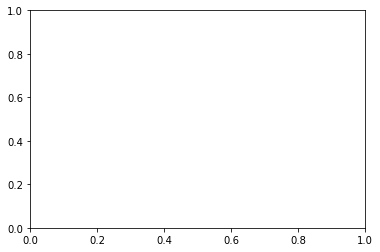

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

r = 1    # enter the timestep you want to see the error histogram
differ = ((y_real_SO - SOpred)/y_real_SO)[:,r-1:r]

#                                                    bar opacity      the bigger, the more splits on x axis
#plt.hist(Histo_SO, color = 'red', edgecolor = 'black', alpha=0.8,  bins = 40 )
plt.hist(differ,  color = 'red', edgecolor = 'black', alpha=0.8,  bins = 200 )
plt.axvline(differ.mean(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(differ.mean()*1.1, max_ylim*1, '  Mean: {:.5f}'.format(differ.mean()))


plt.xlabel("Percentage error (%)")
plt.ylabel("Number of grids")
plt.xlim([-0.2, 0.2])    #change it depend on the ranges
plt.ylim([0, 12000])    #change it depend on the ranges

# this line is to show the y axis in K
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '%.0fk' % (y * 1e-3)))

plt.savefig("Histogram-P.jpg")

# Predicted Output at different timesteps for P

In [67]:
Layer = 1

for i in range(0,n_models):
    P_t = Pf[:,i].reshape((nx*ny,nz), order='F')
    P_L = P_t[:, (Layer-1):Layer]
    RR = P_L.reshape((nx,ny), order ='F')
    
    col_type = cm.get_cmap('rainbow', 256)
    newcolors = col_type(np.linspace(0, 1, 1000))
    #white = np.array([1, 1, 1, 1])
    #newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], RR, 180, 280)

Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15
Timestep 16
Timestep 17
Timestep 18
Timestep 19
Timestep 20


In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(0,20):
    r2_P = r2_score(P_real[:,i], Pf[:,i])
    rmse_P = mean_squared_error(P_real[:,i], Pf[:,i])
    print( "R2: {0:f},   RMSE: {1:f}".format(r2_P, rmse_P))

R2: 0.075207,   RMSE: 27842.624375
R2: 0.072265,   RMSE: 28588.879328
R2: 0.071397,   RMSE: 28862.555440
R2: 0.070992,   RMSE: 29000.290823
R2: 0.071234,   RMSE: 29064.361802
R2: 0.071657,   RMSE: 29087.279899
R2: 0.071999,   RMSE: 29101.383758
R2: 0.072331,   RMSE: 29111.795874
R2: 0.072496,   RMSE: 29123.240822
R2: 0.072704,   RMSE: 29130.601603
R2: 0.072886,   RMSE: 29139.630350
R2: 0.073209,   RMSE: 29140.836387
R2: 0.073386,   RMSE: 29145.146230
R2: 0.073508,   RMSE: 29150.088937
R2: 0.073657,   RMSE: 29153.124809
R2: 0.073824,   RMSE: 29156.913085
R2: 0.073797,   RMSE: 29164.366293
R2: 0.074027,   RMSE: 29162.889685
R2: 0.074093,   RMSE: 29166.116848
R2: 0.074268,   RMSE: 29165.811949


In [ ]:
Diff = np.absolute(Pf - P_real)
print(Diff.shape)
max1 = np.max(Diff)
print(max1)

for i in range(0,n_models):
    P_t = Diff[:,i].reshape((nx*ny,nz), order='F')
    P_L = P_t[:, (Layer-1):Layer]
    YY = P_L.reshape((nx,ny), order ='F')
    
    col_type = cm.get_cmap('cool', 256)
    newcolors = col_type(np.linspace(0, 1, 10000))
    white = np.array([1, 1, 1, 1])
    newcolors[:1, :] = white
    newcmp = ListedColormap(newcolors)
    print('Timestep '+str(i+1))
    #plot_examples([col_type, newcmp], YY, 0, 40)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

r = 1    # enter the timestep you want to see the error histogram
differ_P = ((y_real_P - Ppred)/y_real_P)[:,r-1:r]

#                                                    bar opacity      the bigger, the more splits on x axis
#plt.hist(Histo_SO, color = 'red', edgecolor = 'black', alpha=0.8,  bins = 40 )
plt.hist(differ_P,  color = 'red', edgecolor = 'black', alpha=0.8,  bins = 100 )
plt.axvline(differ_P.mean(), color='k', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(differ_P.mean()*1.1, max_ylim*1, '  Mean: {:.5f}'.format(differ_P.mean()))


plt.xlabel("Percentage error (%)")
plt.ylabel("Number of grids")
plt.xlim([-0.03, 0.03])    #change it depend on the ranges
plt.ylim([0, 14000])    #change it depend on the ranges

# this line is to show the y axis in K
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '%.0fk' % (y * 1e-3)))

#plt.savefig("Histogram-P.jpg")

## Prediction for Well Rates

In [50]:
df_distance = pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/Features/distances.csv').drop_duplicates().reset_index(drop=True)
ave_static = pd.read_csv('C:/Users/pymnb/Downloads/VOLVE/15/Features/average static.csv')

In [263]:
index_tiers = pd.read_csv('C:/Users/pymnb/Downloads/WAG Case/18/Features/index_tiers.csv', header=None)

def AVERAGE(dynamic_feature, timestep_no, surrounding_index):
    
    var_slice_timestep = dynamic_feature[actives_r][:,:,(timestep_no-1)]
    
    var_slice_time_surr = var_slice_timestep[surrounding_index]

    average = np.reshape(np.average(var_slice_time_surr), (1,1))
    
    return average

### Create the average SO, P for Tiers

In [264]:
z3 = pd.DataFrame()

for i in range(21):
    z1 = np.zeros((1,1))
    z2 = np.zeros((1,1))
    for j in range(25):
        T = index_tiers.iloc[:,j:j+1].dropna().astype(int)
        ave1 = AVERAGE(SOf, i, T)
        ave2 = AVERAGE(Pf, i, T)
        result1 = np.concatenate([z1, ave1])
        result2 = np.concatenate([z2, ave2])
        z1 = result1
        z2 = result2
        
    SO_tiers = pd.DataFrame(z1[1:].reshape(1,25))
    P_tiers  = pd.DataFrame(z2[1:].reshape(1,25))
    Tiers = pd.concat([SO_tiers, P_tiers], axis=1)
    Tiers_alltimes = pd.concat([z3, Tiers])
    z3 = Tiers_alltimes
Tier_alltime_allwell = z3.reset_index(drop=True)
Tier_alltime_allwell.columns = range(Tier_alltime_allwell.columns.size)

In [265]:
Tier_alltime_E3H = pd.concat([Tier_alltime_allwell.iloc[:, 0:5], Tier_alltime_allwell.iloc[:, 25:30]], axis=1)
Tier_alltime_E3H.columns = ['SO_T1', 'SO_T2', 'SO_T3', 'SO_T4', 'SO_T5', 'P_T1', 'P_T2', 'P_T3', 'P_T4', 'P_T5']

Tier_alltime_E2H = pd.concat([Tier_alltime_allwell.iloc[:, 5:10], Tier_alltime_allwell.iloc[:, 30:35]], axis=1)
Tier_alltime_E2H.columns = ['SO_T1', 'SO_T2', 'SO_T3', 'SO_T4', 'SO_T5', 'P_T1', 'P_T2', 'P_T3', 'P_T4', 'P_T5']

Tier_alltime_E3AH = pd.concat([Tier_alltime_allwell.iloc[:, 10:15], Tier_alltime_allwell.iloc[:, 35:40]], axis=1)
Tier_alltime_E3AH.columns = ['SO_T1', 'SO_T2', 'SO_T3', 'SO_T4', 'SO_T5', 'P_T1', 'P_T2', 'P_T3', 'P_T4', 'P_T5']

Tier_alltime_F1H = pd.concat([Tier_alltime_allwell.iloc[:, 15:20], Tier_alltime_allwell.iloc[:, 40:45]], axis=1)
Tier_alltime_F1H.columns = ['SO_T1', 'SO_T2', 'SO_T3', 'SO_T4', 'SO_T5', 'P_T1', 'P_T2', 'P_T3', 'P_T4', 'P_T5']

Tier_alltime_F3H = pd.concat([Tier_alltime_allwell.iloc[:, 20:25], Tier_alltime_allwell.iloc[:, 45:50]], axis=1)
Tier_alltime_F3H.columns = ['SO_T1', 'SO_T2', 'SO_T3', 'SO_T4', 'SO_T5', 'P_T1', 'P_T2', 'P_T3', 'P_T4', 'P_T5']

### Generate the final input array

In [311]:
inputs_E3H = pd.concat([time_ind, well_ind1, df_lhs, D_E3H , Tier_alltime_E3H], axis=1).reset_index(drop=True)
inputs_E2H = pd.concat([time_ind, well_ind2, df_lhs, D_E2H , Tier_alltime_E2H], axis=1).reset_index(drop=True)
inputs_E3AH= pd.concat([time_ind, well_ind3, df_lhs, D_E3AH, Tier_alltime_E3AH],axis=1).reset_index(drop=True)
inputs_F1H = pd.concat([time_ind, well_ind4, df_lhs, D_F1H , Tier_alltime_F1H], axis=1).reset_index(drop=True)
inputs_F3H = pd.concat([time_ind, well_ind5, df_lhs, D_F3H , Tier_alltime_F3H], axis=1).reset_index(drop=True)

### Visualization

In [9]:
import matplotlib.pyplot as plt
import joblib

well_ind = 1

#real_prod_BT = pd.read_fwf('C:/Users/pymnb/Downloads/VOLVE/15/Features/BT2-prod.txt', header=None)
#real_prod_BT.columns = ["OPT(11B)", "OPT(12)", "OPT(14)", "OPT(1C)", "OPT(15C)"]

loaded_model = joblib.load('C:/Users/pymnb/Downloads/VOLVE/15/Well models/opt7.sav')

z5 = np.zeros((1,1))
for t in range(1,21):
    input_vector = pd.DataFrame(np.array([t, well_ind, 1937, 273, 3720, 2257, 4777])).transpose()
    result = loaded_model.predict(input_vector).reshape(1,1)
    pred_well = np.concatenate([z5, result])
    z5 = pred_well
opr_pred = z5[1:]

print(opr_pred)
         
#r2_test = r2_score(real_prod_BT['WPT(E3AH)'], wpr_pred)
#print(r2_test)
#
#plt.clf()
#fig, ax = plt.subplots(3,4, figsize=(17,13))
#
##
#ax[0,0].scatter(x = np.arange(21), y = real_prod_BT['WPT(E3AH)'])
##ax[0,0].scatter(x = np.arange(21), y = wpr_pred)
##plt.xlabel("Living Area Above Ground")
##plt.ylabel("House Price")
#
#plt.show()

[[4141800.484]
 [4154634.534]
 [4182241.18 ]
 [4202947.848]
 [4216555.5  ]
 [4238739.266]
 [4259649.408]
 [4275258.468]
 [4286299.134]
 [4300409.676]
 [4315016.052]
 [4324808.686]
 [4332628.644]
 [4348646.394]
 [4360129.63 ]
 [4368572.028]
 [4376977.618]
 [4380135.684]
 [4393601.408]
 [4394195.528]]


In [13]:
import joblib

well = 1

A = pd.DataFrame(np.array([20, 4, 4399, 2605, 308, 4149, 4782])).transpose()
loaded_model = joblib.load('C:/Users/pymnb/Downloads/VOLVE/15/Well models/opt7.sav')
predicted = loaded_model.predict(A)
print(predicted)

[2260365.376]


In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Actual, Pred)
rmse = mean_squared_error(Actual, Pred)

In [54]:
print(r2)
print(rmse)

0.9368775840131484
31802642.49


In [55]:
d = Actual - Pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((Actual-np.mean(Actual))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 4606.91
MSE: 31802642.49
RMSE: 5639.383165737189
R-Squared: [1.02212481]


In [58]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(Actual, Pred)
mse = metrics.mean_squared_error(Actual, Pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(Actual,Pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4606.91
MSE: 31802642.49
RMSE: 5639.383165737189
R-Squared: 0.9368775840131484
